### Objectives
* Revisiting Outliers
* Clustering - DBSCAN

<hr>

* Outliers - Data not part of general representation

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X,_ = make_blobs(n_features=2, centers=2, cluster_std=2.5, n_samples=1000)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'X2')

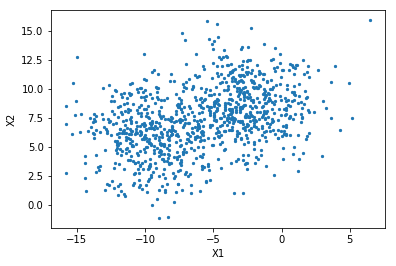

In [6]:
plt.scatter(X[:,0], X[:,1],s =5)
plt.xlabel('X1')
plt.ylabel('X2')

#### Important Notes
* Not all data will be part of any cluster
* There will be some data, clusterless
* DBSCAN can identify clusterless data as well

In [7]:
from sklearn.cluster import DBSCAN

/home/awantik/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [9]:
ss = StandardScaler()

In [10]:
X_tf = ss.fit_transform(X)

In [140]:
dbscan = DBSCAN(eps=.5, min_samples=10)

In [50]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [51]:
dbscan.labels_

array([ 0,  1,  1, -1,  1, -1,  0,  0,  0, -1, -1,  2,  1,  0,  0, 16,  1,
        0,  1,  3,  1,  2, -1,  1,  1,  4,  0,  1,  0,  0,  1,  0, -1,  0,
        0, -1,  0,  0,  1,  0,  0, -1, -1,  2,  1,  0,  1,  0,  1, -1,  1,
        0,  0, -1,  1,  1,  0,  0,  1,  1,  0, -1,  0,  5,  1, -1,  0,  1,
        0,  0, 16,  0,  1,  1,  0,  1,  5,  1,  0,  0,  0,  1,  4,  1,  1,
       -1, -1,  0,  1,  1,  3,  0,  1,  6, -1,  0,  1, -1, -1, -1,  1,  0,
        0,  1,  0,  7,  0,  1, -1, 12,  0,  1,  1,  1,  0,  0,  1,  1,  1,
        1,  1,  1,  0,  0, -1,  1,  0, -1,  0,  0,  7,  0,  0,  1,  0,  1,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  7,  0,  1,  1,  1,
        0,  0,  1,  0,  1, -1, -1,  0,  1,  0,  0,  1, -1, -1,  1,  0, -1,
        1,  0,  0, 16,  0, -1,  1,  1,  0, -1,  0,  0, -1,  0,  1,  1,  0,
       -1,  1,  6,  0, -1,  1,  0,  1,  1, -1,  0,  1,  0, -1,  1,  1,  1,
        0, -1,  0,  1,  1,  1,  7, -1,  1,  8,  9,  0, 15,  0, -1,  1, -1,
        1, -1,  1,  1,  1

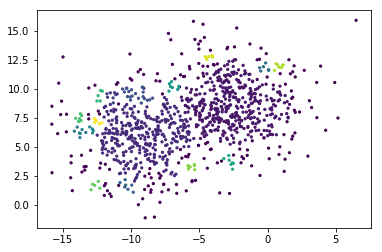

In [52]:
plt.scatter(X[:,0], X[:,1],s =5, c=dbscan.labels_)

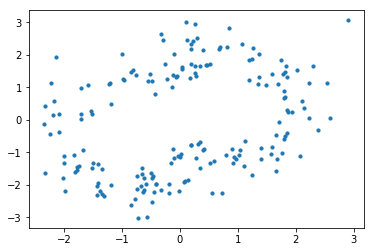

In [57]:
plt.scatter(X_tf[dbscan.labels_ == -1][:,0], X_tf[dbscan.labels_ == -1][:,1],s=10) 

In [58]:

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

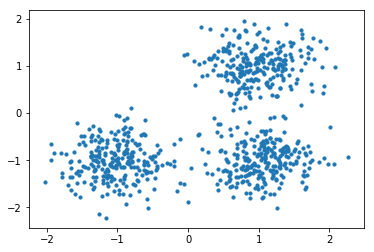

In [59]:

plt.scatter(X[:,0], X[:,1],s=10)

In [84]:
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=.3, min_samples=10).fit(X)

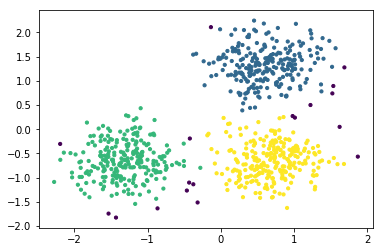

In [85]:

plt.scatter(X[:,0], X[:,1],s=10, c=db.labels_)

* eps : The distance which it will consider as neighbour & form cluster

### On the housing data, find the houses which are outliers

In [87]:
import pandas as pd

/home/awantik/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [90]:
house_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt',index_col='Unnamed: 0')

In [91]:
house_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


### Algorithm
* The algorithm starts with an arbitrary point which has not been visited and its neighborhood information is retrieved from the .eps parameter.
* If this point contains min_samples within .eps neighborhood, cluster formation starts. Otherwise the point is labeled as -1(outlier). 
* This point can be later found within the ϵ neighborhood of a different point and, thus can be made a part of the cluster. Concept of density reachable and density connected points are important here.
* If a point is found to be a core point then the points within the ϵ neighborhood is also part of the cluster. So all the points found within ϵ neighborhood are added, along with their own ϵ neighborhood, if they are also core points.
* The above process continues until the density-connected cluster is completely found.
* The process restarts with a new point which can be a part of a new cluster or labeled as noise.

In [144]:
house_data_tf = ss.fit_transform(house_data[['Sqft','Price']])

In [159]:
dbscan = DBSCAN(eps=.1, min_samples=10)

In [160]:
dbscan.fit(house_data_tf)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [153]:
sum(dbscan.labels_ == -1)

26

In [136]:
house_data[dbscan.labels_ == -1]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Cluster
8,757.854,5,14,1,0,1,48000,-1
21,2490.600,19,21,5,3,4,140000,-1
25,3664.740,19,19,3,2,3,200000,-1
27,3664.740,19,19,3,2,3,200000,-1
28,3059.880,21,24,4,2,3,145000,-1
32,1245.300,10,12,3,0,0,85000,-1
39,3735.900,19,19,3,2,3,200000,-1
41,3063.438,21,24,5,2,4,145000,-1
49,3735.900,19,19,3,2,3,200000,-1
55,4643.190,1,6,5,4,4,180000,-1


In [135]:
house_data['Cluster'] = dbscan.labels_

In [137]:
house_data[dbscan.labels_ == 1]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Cluster
11,668.904,4,11,1,1,1,31000,1
12,711.600,4,7,2,1,1,29002,1
18,462.540,5,13,1,1,1,25000,1
29,533.700,3,4,1,1,1,25000,1
30,853.920,6,7,2,1,1,24028,1
36,462.540,3,4,1,1,1,52000,1
42,925.080,10,14,2,1,1,48000,1
50,711.600,4,7,2,1,1,24030,1
57,640.440,5,7,1,1,1,36000,1
61,604.860,6,10,2,1,1,30000,1


In [138]:
house_data[dbscan.labels_ == 0]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Cluster
1,1177.698,2,7,2,2,2,62000,0
2,2134.800,5,7,4,2,2,78000,0
3,1138.560,5,7,2,2,1,58000,0
4,1458.780,2,7,3,2,2,45000,0
5,967.776,11,14,3,2,2,45000,0
6,1127.886,11,12,4,2,2,148000,0
7,1352.040,5,7,3,2,1,58000,0
9,1152.792,10,12,3,2,2,45000,0
10,1423.200,4,5,4,2,2,65000,0
13,1352.040,9,19,4,2,2,39000,0


In [139]:
house_data[dbscan.labels_ == -1]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Cluster
8,757.854,5,14,1,0,1,48000,-1
21,2490.600,19,21,5,3,4,140000,-1
25,3664.740,19,19,3,2,3,200000,-1
27,3664.740,19,19,3,2,3,200000,-1
28,3059.880,21,24,4,2,3,145000,-1
32,1245.300,10,12,3,0,0,85000,-1
39,3735.900,19,19,3,2,3,200000,-1
41,3063.438,21,24,5,2,4,145000,-1
49,3735.900,19,19,3,2,3,200000,-1
55,4643.190,1,6,5,4,4,180000,-1


Text(0, 0.5, 'Price')

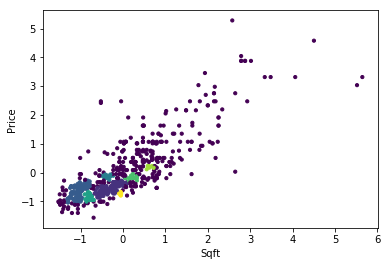

In [161]:
plt.scatter(house_data_tf[:,0], house_data_tf[:,1],s=10, c=dbscan.labels_)
plt.xlabel('Sqft')
plt.ylabel('Price')

## Topics for Assessment

#### Nearest Neighbours
* Classification
* Regression

#### Preprocessing
* Scaling - StandardScaler, MinMaxScaler
* Categorical Data - LabelEncoder

#### Three clustering topic you have to master
* KMeans
* Aggo
* DBSCAN
